In [1]:
import numpy as np
import pandas as pd 
import cv2
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
%matplotlib inline

c:\users\tc_18\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
a=data.iloc[2,1:].values

In [5]:
a=a.reshape(28,28).astype('uint8')

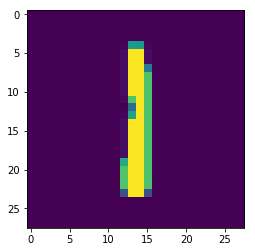

In [6]:
plt.imshow(a)

In [7]:
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=4)
#Split arrays or matrices into random train and test subsets
#Insted of all rows this function will give random rows using shuffel

In [27]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
12696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y_train.head()

12696    0
4362     6
3847     2
38550    6
32222    7
Name: label, dtype: int64

In [29]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)    #Build a forest of trees from the training set (X, y).

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
pred=rf.predict(x_test)    #Predict regression target for X.

In [31]:
pred

array([0, 4, 0, ..., 3, 1, 7], dtype=int64)

In [32]:
s=y_test.values
count=0

In [33]:
for i in range(len(pred)):
    if pred[i]==s[i]:
        count=count+1

In [34]:
count

3945

In [35]:
len(pred)

4200

In [36]:
count/len(pred)

0.9392857142857143

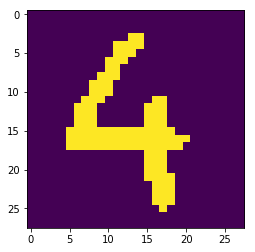

In [19]:
test_img = cv2.imread('test.png')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(test_img, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
#print(mask_inv)
plt.imshow(mask_inv)

In [20]:
height, width = test_img.shape

In [21]:
mask_inv=mask_inv.reshape(28,28).astype('uint8')

In [22]:
x = []
for i in range(height):
    for j in range(width):
        #print(mask_inv[i,j])
        x.append(mask_inv[i,j])
z = np.array(x)
print(z)        

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 255 255   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255
 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 255 255 255   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255
 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 255 255   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
 255 255   0   0   0   0   0   0   0   0   0   0   

In [23]:
#z=z.reshape(28,28).astype('uint8')
z=z.reshape(1,-1).astype('uint8')
pred=rf.predict(z)
pred

array([4], dtype=int64)

In [24]:
test_data=pd.read_csv('test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test_a=data.iloc[11,1:].values
print(test_a)
test_a=test_a.reshape(1,-1).astype('uint8')
plt.imshow(test_ab)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  15  48 143 186 244 143  31   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  83 209 253 252 252 252 252
 192  15   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   5 166 241 252 253 252 170 162 252 252 113   

NameError: name 'test_ab' is not defined

In [ ]:
pred=rf.predict(test_a)

In [ ]:
pred